In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
X = pd.read_csv("creditcard.csv")

In [3]:
print("The data looks like :")
print(X.head())
print(X.columns)

The data looks like :
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V2

In [4]:
print(X.describe())
# data looks pretty normal , not much need to normalise 
# and time and amount shouldnt be normalised I think 

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

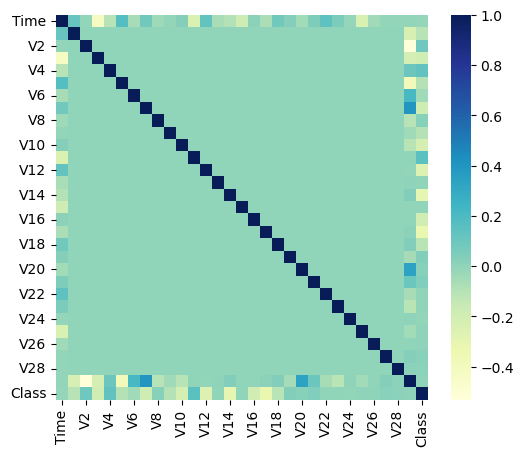

<Figure size 640x480 with 0 Axes>

In [5]:
# correlation heatmap 
corrMatrix=X.corr()
sns.heatmap(data=corrMatrix, annot=False , cmap="YlGnBu")
plt.gcf().set_size_inches(6, 5)
plt.figure()
plt.show()

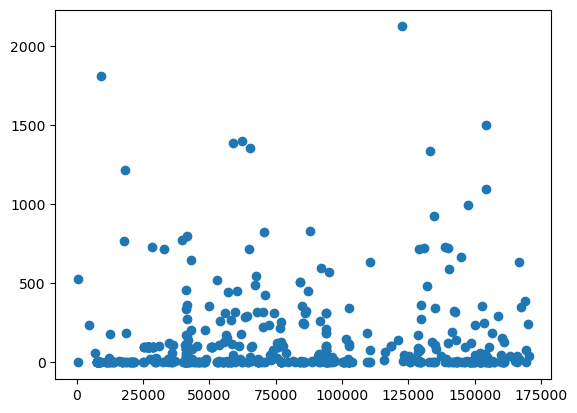

In [6]:
# plot of frauds with time 
plt.scatter(x=X.loc[X['Class']==1]['Time'], y=X.loc[X['Class']==1]['Amount'])
plt.show()

<Figure size 75x50 with 0 Axes>

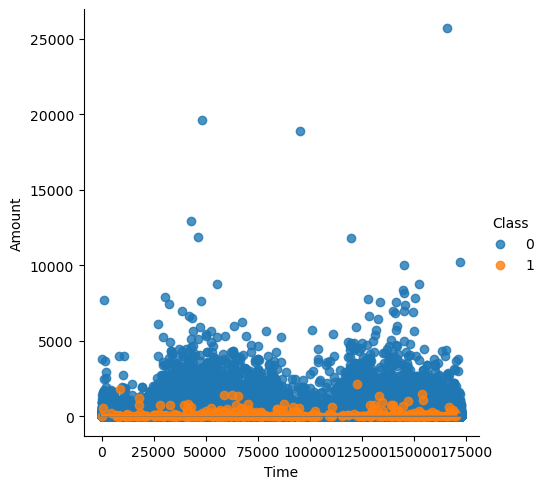

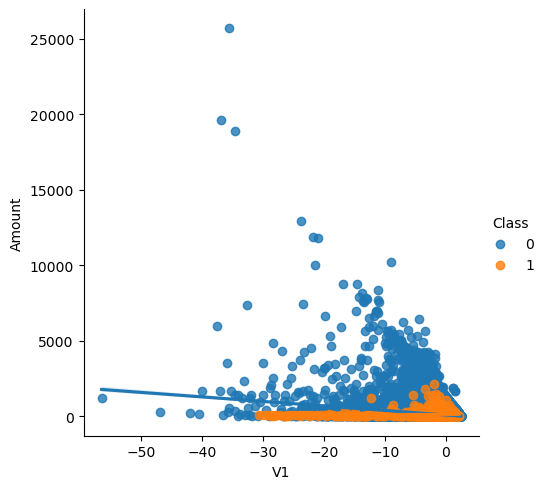

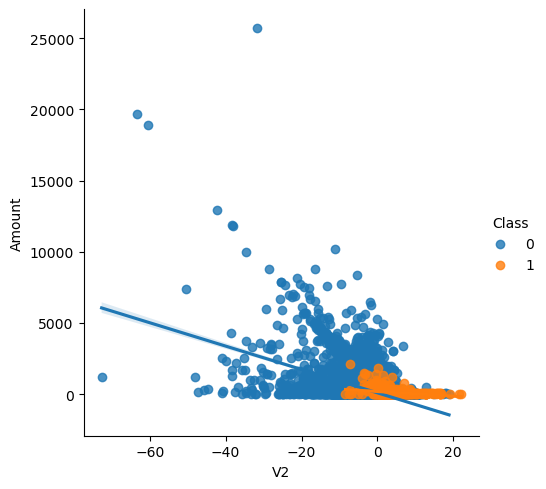

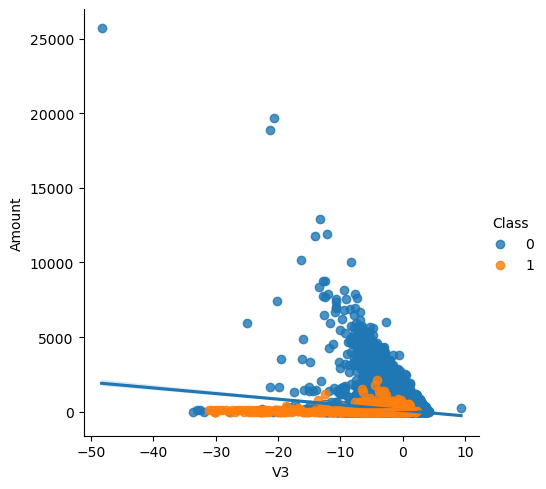

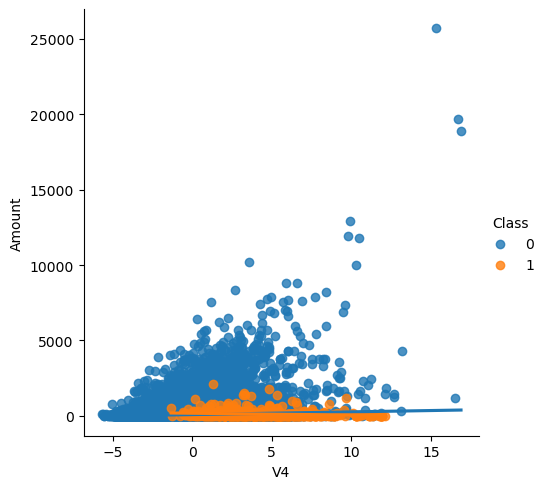

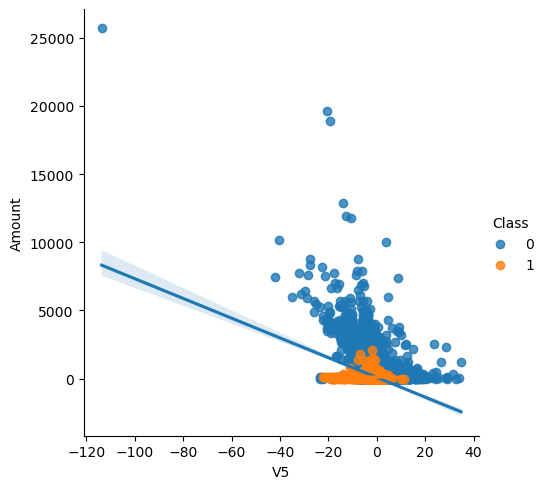

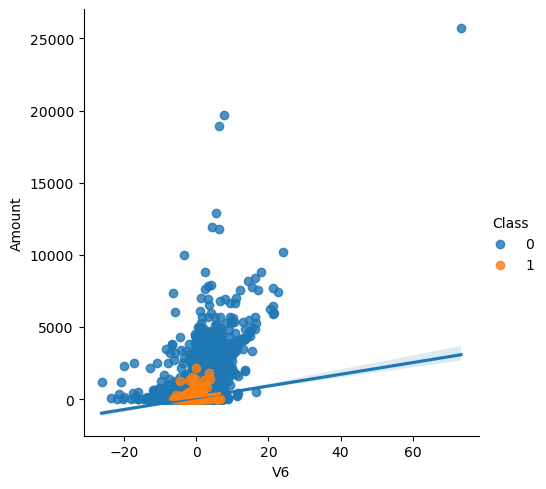

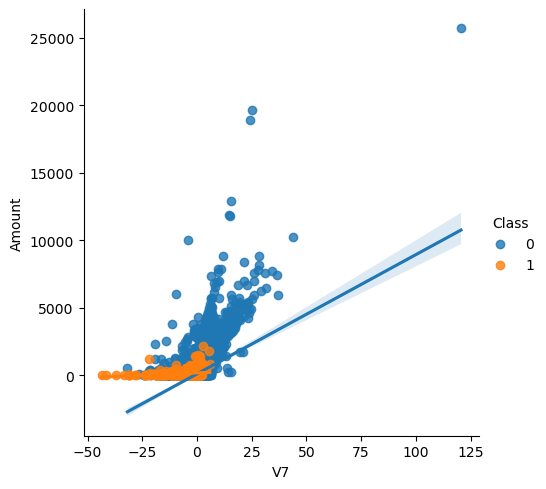

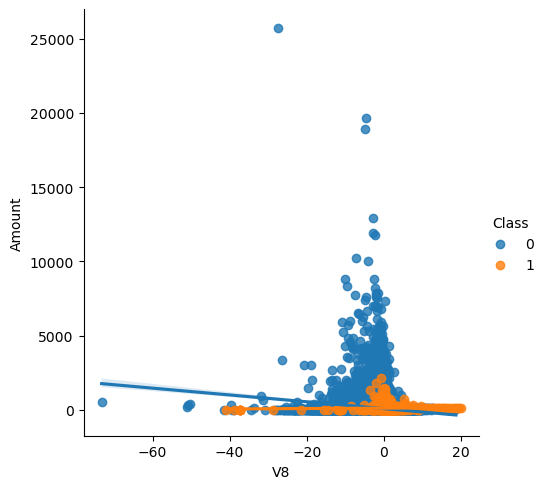

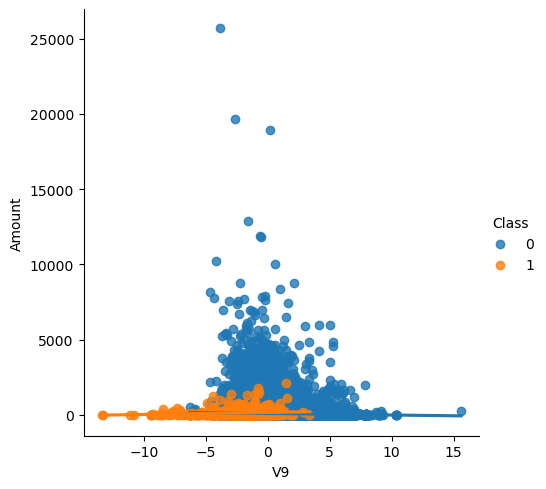

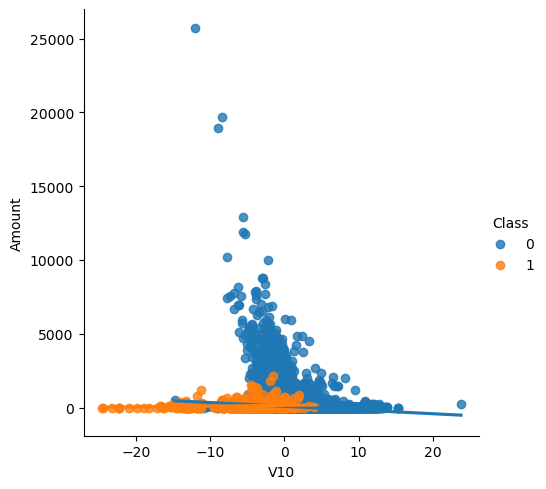

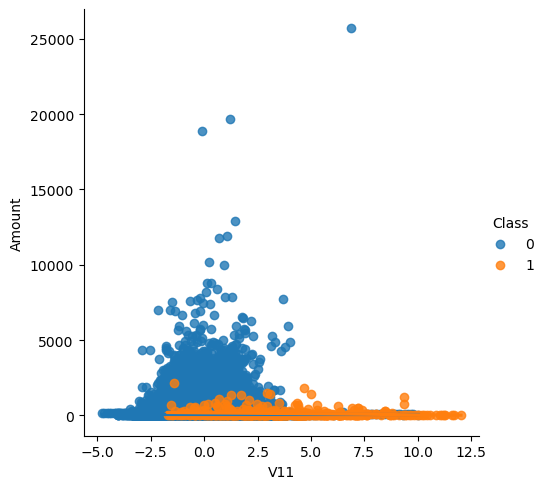

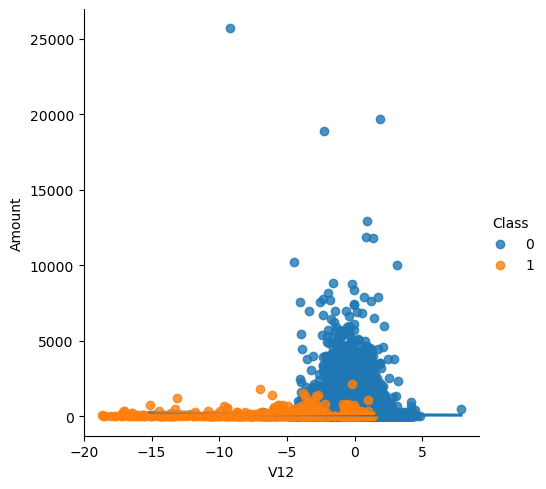

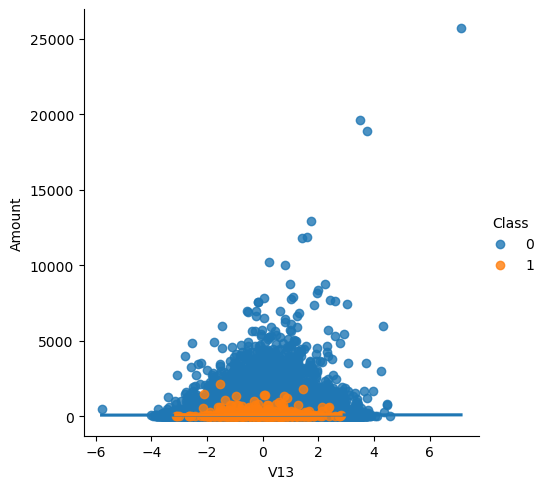

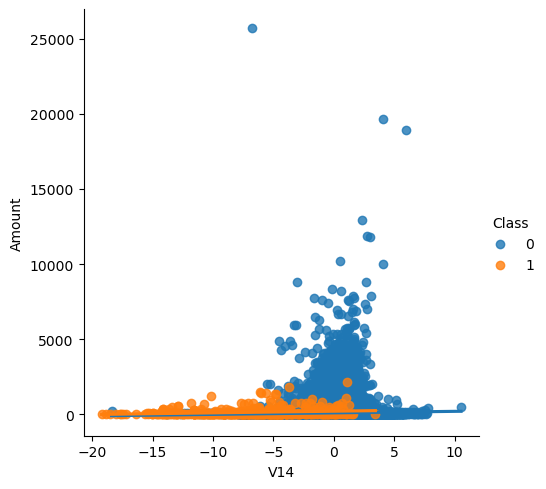

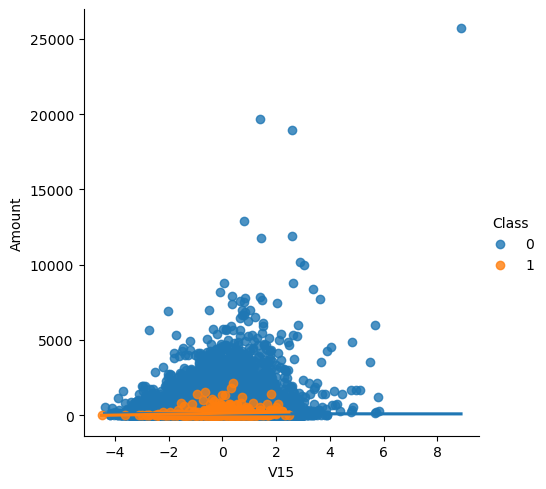

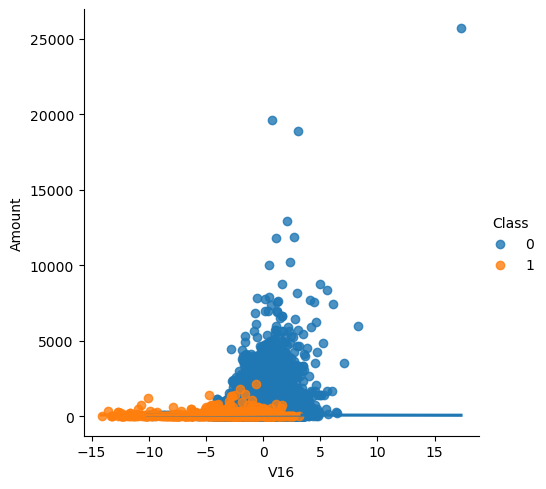

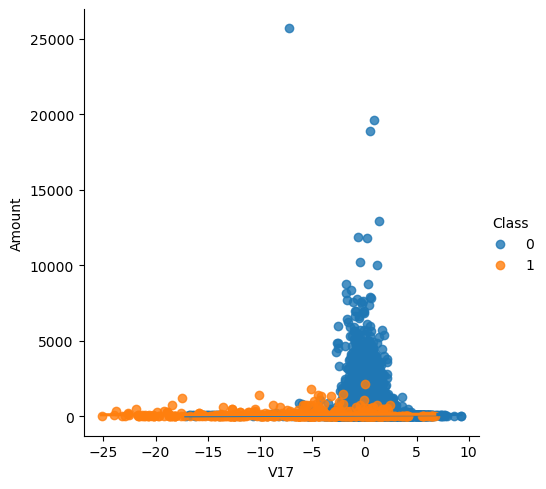

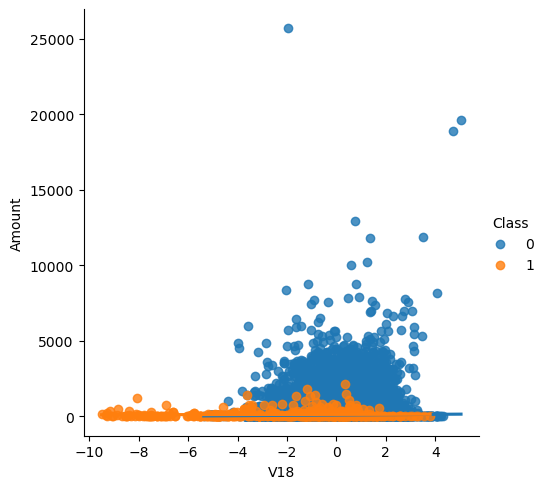

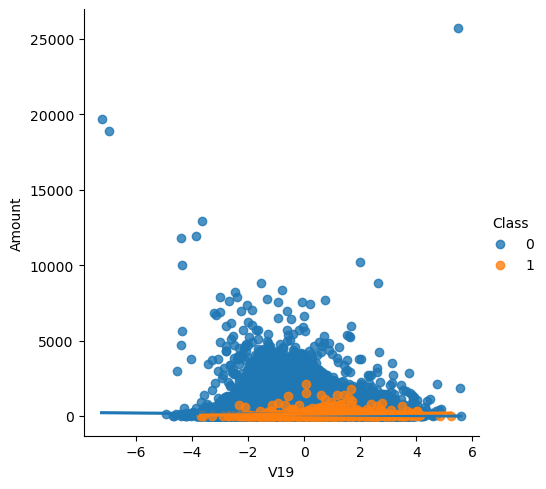

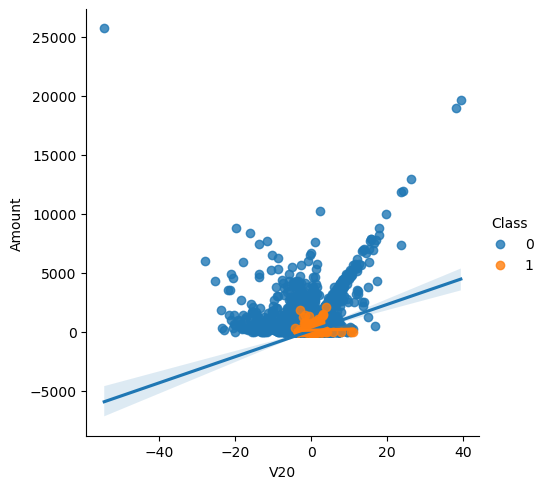

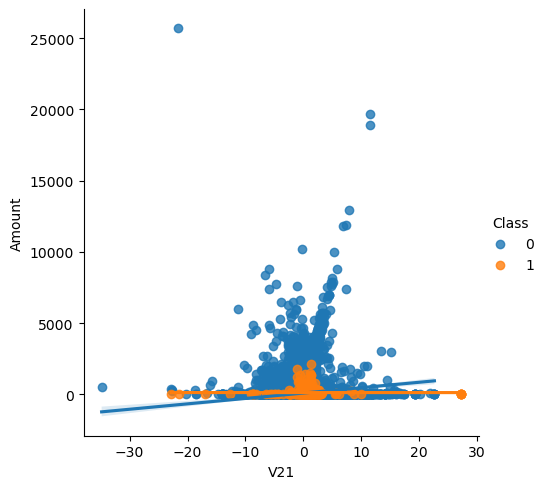

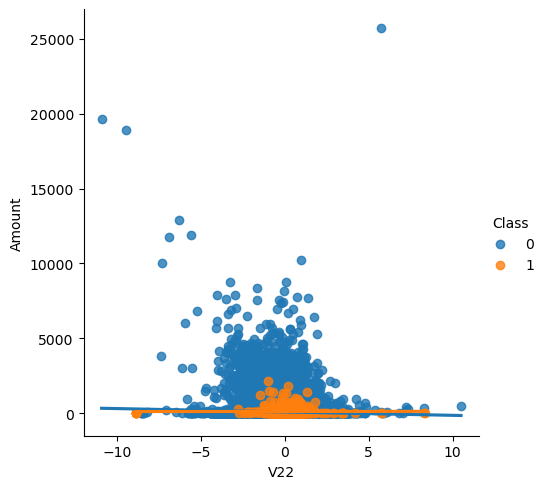

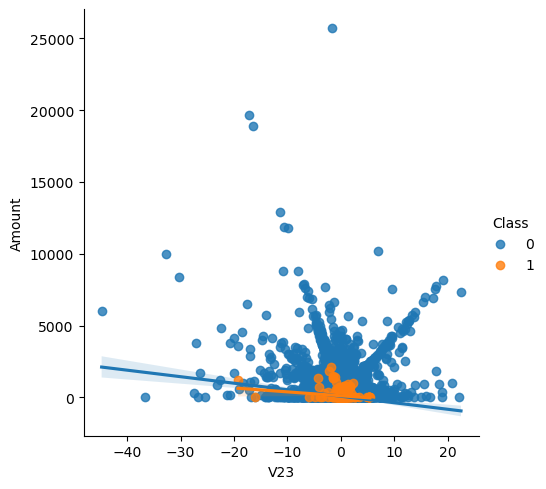

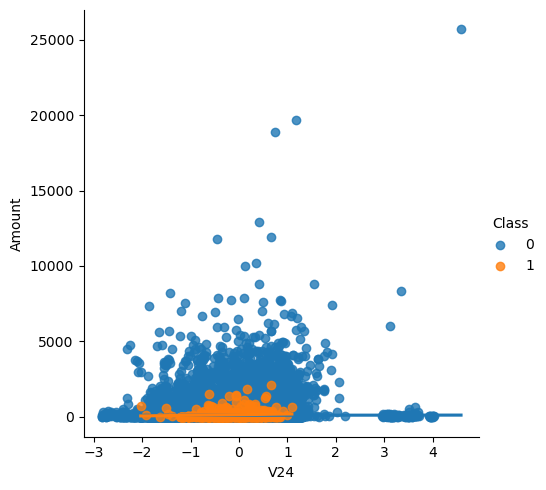

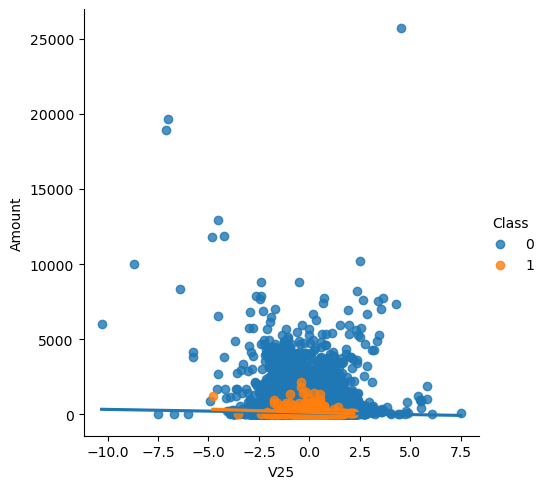

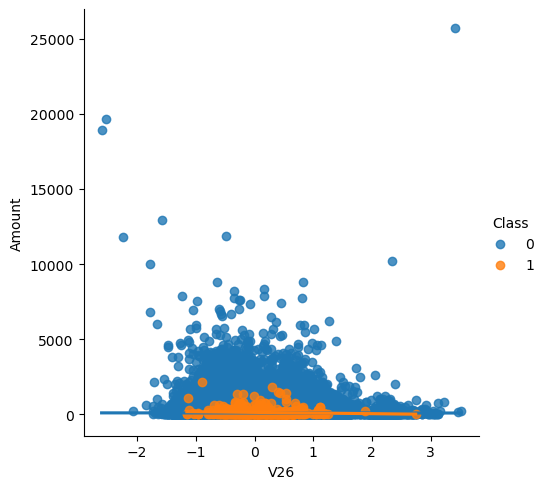

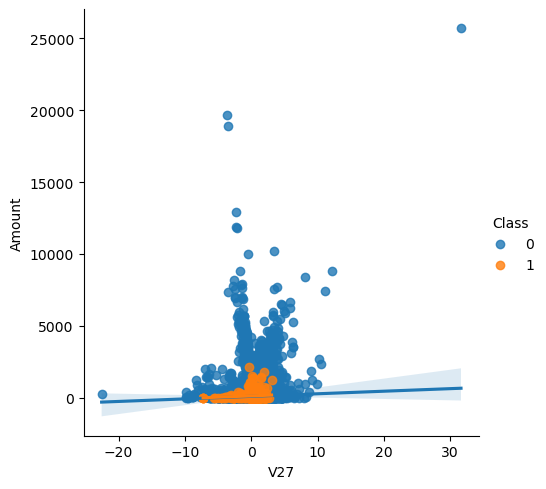

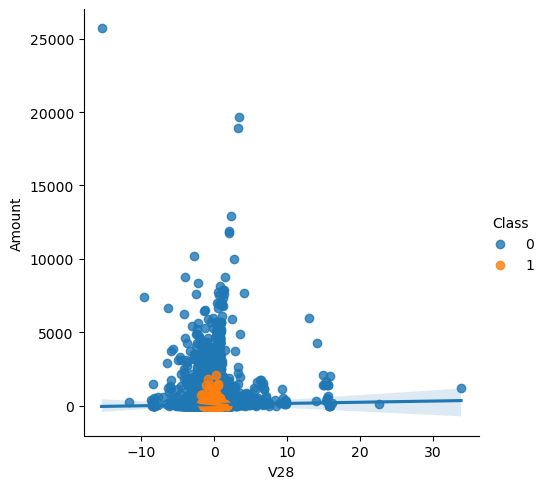

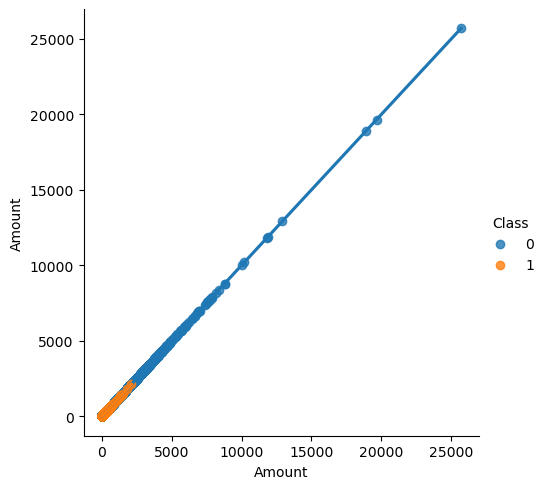

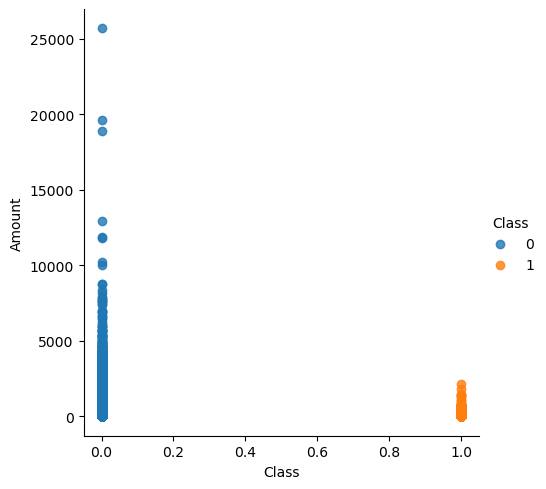

In [7]:
plt.gcf().set_size_inches(0.75, 0.5)
for col in X.columns:
  sns.lmplot(x=col, y='Amount', hue='Class', data=X)
  plt.show()

0    284315
1       492
Name: Class, dtype: int64




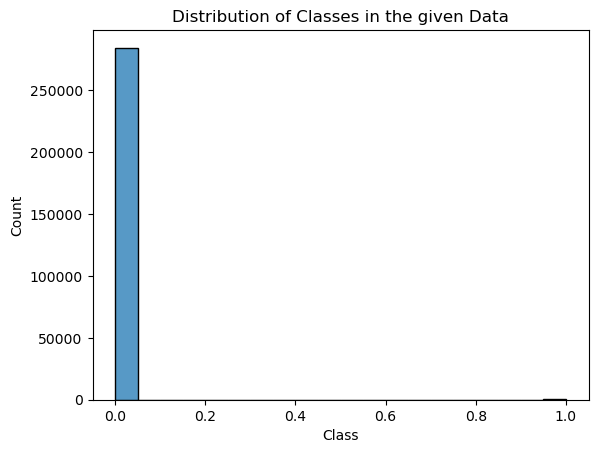

In [8]:
# value counts of class 
sns.histplot(X['Class'])
plt.title("Distribution of Classes in the given Data")
print(X['Class'].value_counts())
print()
print()
plt.show()
# huge imbalance seen 

In [9]:
# dividing X and y 
y = X['Class']
X.drop(['Class'],axis=1,inplace=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [10]:
# using SMOTE 
from imblearn.over_sampling import SMOTE
smote_1=SMOTE()
X_train,y_train= smote_1.fit_resample(X_train,y_train)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/Users/kushalsgowda/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py)

In [ ]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
# it wasnt converging for 100 iterations(the default value of the function) so had to set this manually 
classifier = LogisticRegression(max_iter=150)
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error,r2_score
pred_train = classifier.predict(X_train)
report_train = classification_report(y_train,pred_train)
print(report_train)
pred_test = classifier.predict(X_test)
report_test = classification_report(y_test,pred_test)
print(report_test)

In [ ]:
from sklearn.metrics import confusion_matrix

# conf_matrix_train = confusion_matrix(y_true=y_train, y_pred=pred_train)
# print("Train result confusion matrix is :")
# print(conf_matrix_train)

conf_matrix_test = confusion_matrix(y_true=y_test, y_pred=pred_test)
print("Test result confusion matrix is :")
print(conf_matrix_test)
sns.heatmap(data=conf_matrix_test, annot=True , cmap="YlGnBu")
plt.show()
print()
print("Pretty great , we only missed 11 frauds from detection out of 101 , 90% safety improvement here")
print()
precision_test = ((conf_matrix_test[0][0])/(conf_matrix_test[1][0]+conf_matrix_test[0][0]))
print("Precision :"+str(precision_test))
recall_test = ((conf_matrix_test[0][0])/(conf_matrix_test[0][1]+conf_matrix_test[0][0]))
print("Recall :"+str(recall_test))
f1_score_test = ((2)/ ( (1/precision_test) + (1/recall_test) ))
print("f1_score_test : "+str(f1_score_test))
print()
print("The F1 score is very good hence my project is successful .")

In [150]:
# Project by Ayush Agarwal 
# PROJECT - CREDIT CARD FRAUD PREDICTION USING LOGISTIC REGRESSION 
# IIT BHU Varanasi , Electronics Engineering Student 
# ayush.agarwal.ece20@itbhu.ac.in
# https://www.linkedin.com/in/ayush-agarwal-261041215/
# https://github.com/ayush-agarwal-0502